In [7]:
# Define parameters to run the notebook here
C = 0.015
Gc = 0.1
ggap = 0.0
gsyn = 1.0

# Example params where oscillation is seen
"""
C = 0.015
Gc = 0.1
ggap = 1.0
gsyn = 1.0

Elapsed time: 3.71s
Dominant period: 2.00
Dimensionality: 1.53
Dominant amplitude: 230.41
Dominant amplitude convergence: 1.00
"""

# Example params where oscillation keeps diminishing. Not sure if it will ever stabilize.
"""
C = 0.002
Gc = 0.7
ggap = 1.0
gsyn = 1.0

Elapsed time: 0.85s
Dominant period: 4.99
Dimensionality: 1.91
Dominant amplitude: 0.02
Dominant amplitude convergence: 0.62
"""

'\nC = 0.002\nGc = 0.7\nggap = 1.0\ngsyn = 1.0\n\nElapsed time: 0.85s\nDominant period: 4.99\nDimensionality: 1.91\nDominant amplitude: 0.02\nDominant amplitude convergence: 0.62\n'

# Run simulation

In [8]:
import numpy as np
import pandas as pd
import time
from neural_model import NeuralModel
from simulation_functions import *
from sklearn.decomposition import PCA
from util.analysis_util import *
from util.neuron_metadata import *
from util.plot_util import *

neuron_metadata_collection = NeuronMetadataCollection.load_from_chem_json('data/chem.json')

start_time = time.time()
all_dynamics = simulate_until_stable(C, Gc, ggap, gsyn)
elapsed_time = time.time() - start_time

Simulation length 1000.00, raw amplitude diff 997.75, scaled amplitude diff 14917.05, amplitude 14917.05
Simulation length 2000.00, raw amplitude diff 0.19, scaled amplitude diff 1.36, amplitude 1.36


# Simulation key statistics

In [3]:
last_n = 1000
n = all_dynamics.shape[0]
last_dynamics = all_dynamics[-last_n:,:]
pca = PCA()

# Perform mean-centering before PCA
X = last_dynamics - last_dynamics.mean(axis= 0)
projected_X = pca.fit_transform(last_dynamics)
dom_mode = projected_X[:,0]
dom_amplitude = get_amplitude(dom_mode)
dom_amplitude_diff_raw, dom_amplitude_diff_scaled = get_amplitude_differences(dom_mode)
dom_period = get_period(dom_mode)

eigen_vals = get_eigenvalues_from_pca(pca, last_n)
dimensionality = get_dimensionality(eigen_vals)
print("Elapsed time: {0:.2f}s".format(elapsed_time))
print("Dominant period: {0:.2f}".format(dom_period))
print("Dominant amplitude: {0:.2f}".format(dom_amplitude))
print("Dominant amplitude diff raw: {0:.2f}".format(dom_amplitude_diff_raw))
print("Dominant amplitude diff scaled: {0:.2f}".format(dom_amplitude_diff_scaled))
print("Dimensionality: {0:.2f}".format(dimensionality))

Elapsed time: 0.89s
Dominant period: 9.98
Dominant amplitude: 0.00
Dominant amplitude diff raw: 0.00
Dominant amplitude diff scaled: 3.57
Dimensionality: 1.00


# Simulation summarized dynamics

Text(0.5, 1.0, 'Top 2 PCs on entire run')

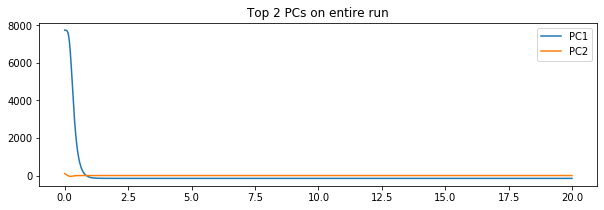

In [4]:
all_X = all_dynamics - all_dynamics.mean(axis= 0)
projected_all_X = pca.fit_transform(all_dynamics)
times = np.arange(0, n * 0.01 , 0.01)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax.plot(times, projected_all_X[:,0], label = "PC1")
ax.plot(times, projected_all_X[:,1], label = "PC2")
ax.legend()
ax.set_title("Top 2 PCs on entire run")

Text(0.5, 1.0, 'Top 2 PCs in the last moments before convergence')

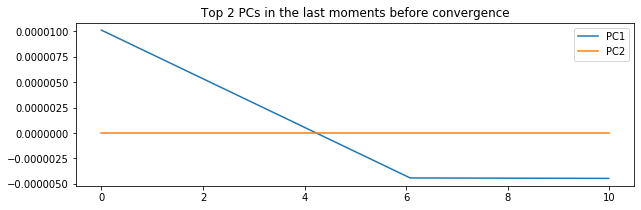

In [5]:
times = np.arange(0, last_n * 0.01 , 0.01)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax.plot(times, projected_X[:,0], label = "PC1")
ax.plot(times, projected_X[:,1], label = "PC2")
ax.legend()
ax.set_title("Top 2 PCs in the last moments before convergence")

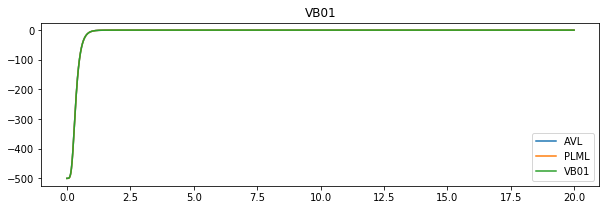

In [6]:
# Plot initial dynamics
# AVL = interneuron. PLML = sensory neuron. VB01 = motor neuron.
_ = plot_saved_dynamics_collapsed(['AVL', 'PLML', 'VB01'], all_dynamics, neuron_metadata_collection)

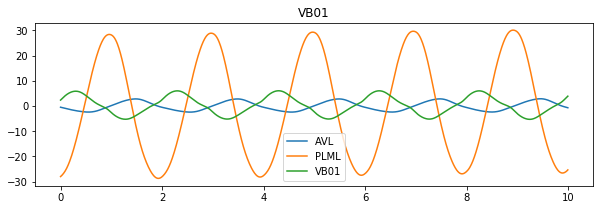

In [7]:
# Plot last half
_ = plot_saved_dynamics_collapsed(['AVL', 'PLML', 'VB01'], all_dynamics[int(-n/2):,], neuron_metadata_collection)